## Result 8: VSI under different exclusion conditons
Examine VSI under different marker exclusion conditions to assess whether MOD marker transcripts influence VSI:  
- using all transcripts  
- excluding MOD1 markers  
- excluding MOD2 markers  
- excluding all MOD markers  

In [104]:
from pathlib import Path

import sys
import os
sys.path.append(os.path.abspath("../src"))

import importlib
import plot
importlib.reload(plot)
import utils
importlib.reload(utils)

from utils import load_merfish_signal_df, load_banksy_result, load_merfish_data, load_boundaries_data
from utils import extract_cell_vsi
from plot import histogram_comparison, plot_vsi_distribution_comparison, plot_normalized_histogram, plot_doublets

import numpy as np
import pandas as pd

### data

#### Signals in the Tissue Section

In [ ]:
MERFISH_data_folder_path = Path("../data/mouse_hypothalamus/MERFISH/")

In [ ]:
signal_coordinate_df, coordinate_x_m, coordinate_y_m = load_merfish_signal_df(MERFISH_data_folder_path/"merfish_barcodes_example.csv")

#### Results of Ovrlpy

results:  
- signal integrity  
- signal strength  

In [ ]:
ovrlpy_result_folder = Path("../data/results/VSI/")
signal_integrity = np.loadtxt(ovrlpy_result_folder/"SignalIntegrity.txt")
signal_strength = np.loadtxt(ovrlpy_result_folder/"SignalStrength.txt")

In [ ]:
# exclude MOD marker signals
nonMOD_signal_integrity = np.loadtxt(ovrlpy_result_folder/"SignalIntegrity_exMOD.txt")
nonMOD_signal_strength = np.loadtxt(ovrlpy_result_folder/"SignalStrength_exMOD.txt")

In [ ]:
# exclude MOD marker signals
nonMOD1_signal_integrity = np.loadtxt(ovrlpy_result_folder/"SignalIntegrity_exMOD1.txt")
nonMOD1_signal_strength = np.loadtxt(ovrlpy_result_folder/"SignalStrength_exMOD1.txt")

In [ ]:
# exclude MOD marker signals
nonMOD2_signal_integrity = np.loadtxt(ovrlpy_result_folder/"SignalIntegrity_exMOD2.txt")
nonMOD2_signal_strength = np.loadtxt(ovrlpy_result_folder/"SignalStrength_exMOD2.txt")

In [ ]:
# doublets
doublets_all = pd.read_csv(ovrlpy_result_folder/"doublets_df.csv")
doublets_exMOD = pd.read_csv(ovrlpy_result_folder/"doublets_exMOD_df.csv")
doublets_exMOD1 = pd.read_csv(ovrlpy_result_folder/"doublets_exMOD1_df.csv")
doublets_exMOD2 = pd.read_csv(ovrlpy_result_folder/"doublets_exMOD2_df.csv")

#### Results of BANKSY

In [ ]:
banksy_folder_path = Path("../data/banksy_results/")

In [ ]:
banksy_result = load_banksy_result(banksy_folder_path/"banksy_cluster.txt", coordinate_x_m, coordinate_y_m)

#### Segmentation Dataset

In [ ]:
merfish_data = load_merfish_data(MERFISH_data_folder_path / "merfish_all_cells.csv", 
                                 banksy_result, coordinate_x_m, coordinate_y_m, 
                                 animal_id=1, bregma_value=-0.24)

#### Cell boundaries

In [ ]:
boundaries_df = load_boundaries_data(MERFISH_data_folder_path/'cellboundaries_example_animal.csv', 
                                     merfish_data, coordinate_x_m, coordinate_y_m)

#### Marker Genes

differentially expressed genes identified by BANKSY

In [ ]:
# all differentially expressed genes
DE_genes = ['Mlc1', 'Dgkk', 'Cbln2', 'Syt4', 'Gad1', 'Plin3', 'Gnrh1', 'Sln', 'Gjc3', 'Mbp', 'Lpar1', 'Trh', 'Ucn3', 'Cck']
# DE_genes_MOD2: 7
DE_genes_MOD2 = ['Mlc1', 'Dgkk', 'Cbln2', 'Syt4', 'Gad1', 'Plin3', 'Gnrh1', 'Sln', 'Gjc3']
# DE_genes_MOD1: 8
DE_genes_MOD1 = ['Mbp', 'Lpar1', 'Trh', 'Ucn3', 'Cck']

In [80]:
MOD_boundaries = boundaries_df[(boundaries_df['banksy'] == 8) | (boundaries_df['banksy'] == 7)]
MOD1_boundaries = boundaries_df[boundaries_df['banksy'] == 8]
MOD2_boundaries = boundaries_df[boundaries_df['banksy'] == 7]
other_boundaries = boundaries_df[~boundaries_df['banksy'].isin([8, 7])]

### VSI under Exclusive Conditions

In [ ]:
histogram_comparison(signal_integrity, signal_strength, 
                     nonMOD1_signal_integrity, nonMOD1_signal_strength, 
                     nonMOD2_signal_integrity, nonMOD2_signal_strength, 
                     nonMOD_signal_integrity, nonMOD_signal_strength, 
                     signal_threshold=3, xlim=(0,8), log=False)

In [ ]:
cell_si, cell_ss = extract_cell_vsi(boundary_df=boundaries_df, integrity=signal_integrity, strength=signal_strength, integrity_size=1800)
cell_si_nonMOD1, cell_ss_nonMOD1 = extract_cell_vsi(boundary_df=boundaries_df, integrity=nonMOD1_signal_integrity, strength=nonMOD1_signal_strength, integrity_size=1800)
cell_si_nonMOD2, cell_ss_nonMOD2 = extract_cell_vsi(boundary_df=boundaries_df, integrity=nonMOD2_signal_integrity, strength=nonMOD2_signal_strength, integrity_size=1800)
cell_si_nonMOD, cell_ss_nonMOD = extract_cell_vsi(boundary_df=boundaries_df, integrity=nonMOD_signal_integrity, strength=nonMOD_signal_strength, integrity_size=1800)

In [ ]:
histogram_comparison(cell_si, cell_ss, 
                     cell_si_nonMOD1, cell_ss_nonMOD1, 
                     cell_si_nonMOD2, cell_ss_nonMOD2,
                     cell_si_nonMOD, cell_ss_nonMOD, 
                     signal_threshold=3, xlim=(0,8), log=False)

In [ ]:
MOD_si, MOD_ss = extract_cell_vsi(boundary_df=MOD_boundaries, integrity=signal_integrity, strength=signal_strength, integrity_size=1800)
MOD_si_nonMOD1, MOD_ss_nonMOD1 = extract_cell_vsi(boundary_df=MOD_boundaries, integrity=nonMOD1_signal_integrity, strength=nonMOD1_signal_strength, integrity_size=1800)
MOD_si_nonMOD2, MOD_ss_nonMOD2 = extract_cell_vsi(boundary_df=MOD_boundaries, integrity=nonMOD2_signal_integrity, strength=nonMOD2_signal_strength, integrity_size=1800)
MOD_si_nonMOD, MOD_ss_nonMOD = extract_cell_vsi(boundary_df=MOD_boundaries, integrity=nonMOD_signal_integrity, strength=nonMOD_signal_strength, integrity_size=1800)

In [ ]:
histogram_comparison(MOD_si, MOD_ss, 
                     MOD_si_nonMOD1, MOD_ss_nonMOD1, 
                     MOD_si_nonMOD2, MOD_ss_nonMOD2,
                     MOD_si_nonMOD, MOD_ss_nonMOD, 
                     signal_threshold=3, xlim=(1e-1,64), log=True)

In [ ]:
MOD1_si, MOD1_ss = extract_cell_vsi(boundary_df=MOD1_boundaries, integrity=signal_integrity, strength=signal_strength, integrity_size=1800)
MOD1_si_nonMOD1, MOD1_ss_nonMOD1 = extract_cell_vsi(boundary_df=MOD1_boundaries, integrity=nonMOD1_signal_integrity, strength=nonMOD1_signal_strength, integrity_size=1800)
MOD1_si_nonMOD2, MOD1_ss_nonMOD2 = extract_cell_vsi(boundary_df=MOD1_boundaries, integrity=nonMOD2_signal_integrity, strength=nonMOD2_signal_strength, integrity_size=1800)
MOD1_si_nonMOD, MOD1_ss_nonMOD = extract_cell_vsi(boundary_df=MOD1_boundaries, integrity=nonMOD_signal_integrity, strength=nonMOD_signal_strength, integrity_size=1800)

In [ ]:
histogram_comparison(MOD1_si, MOD1_ss, 
                     MOD1_si_nonMOD1, MOD1_ss_nonMOD1, 
                     MOD1_si_nonMOD2, MOD1_ss_nonMOD2,
                     MOD1_si_nonMOD, MOD1_ss_nonMOD, 
                     signal_threshold=3, xlim=(1e-1,64), log=True)

In [ ]:
MOD2_si, MOD2_ss = extract_cell_vsi(boundary_df=MOD2_boundaries, integrity=signal_integrity, strength=signal_strength, integrity_size=1800)
MOD2_si_nonMOD1, MOD2_ss_nonMOD1 = extract_cell_vsi(boundary_df=MOD2_boundaries, integrity=nonMOD1_signal_integrity, strength=nonMOD1_signal_strength, integrity_size=1800)
MOD2_si_nonMOD2, MOD2_ss_nonMOD2 = extract_cell_vsi(boundary_df=MOD2_boundaries, integrity=nonMOD2_signal_integrity, strength=nonMOD2_signal_strength, integrity_size=1800)
MOD2_si_nonMOD, MOD2_ss_nonMOD = extract_cell_vsi(boundary_df=MOD2_boundaries, integrity=nonMOD_signal_integrity, strength=nonMOD_signal_strength, integrity_size=1800)

In [ ]:
histogram_comparison(MOD2_si, MOD2_ss, 
                     MOD2_si_nonMOD1, MOD2_ss_nonMOD1, 
                     MOD2_si_nonMOD2, MOD2_ss_nonMOD2,
                     MOD2_si_nonMOD, MOD2_ss_nonMOD, 
                     signal_threshold=3, xlim=(1e-1,64), log=True)

### normalized hist: MOD2/MOD1

#### exclusive distribution: MOD1 and MOD2

In [ ]:
vals1, bins1, vals2, bins2 = plot_vsi_distribution_comparison(
    cell_integrity_1=MOD1_si,
    cell_strength_1=MOD1_ss,
    cell_integrity_2=MOD2_si,
    cell_strength_2=MOD2_ss,
    title="All Signals",
    signal_threshold=3.0,
    ylim=(1e-1,64),
    figure_height=7
)

In [ ]:
plot_normalized_histogram(vals1, vals2, bins2, epsilon=1e-10, title = "All Signals", ylim=(1e-1, 10**11))

In [ ]:
vals1, bins1, vals2, bins2 = plot_vsi_distribution_comparison(
    cell_integrity_1=MOD1_si_nonMOD1,
    cell_strength_1=MOD1_ss_nonMOD1,
    cell_integrity_2=MOD2_si_nonMOD1,
    cell_strength_2=MOD2_ss_nonMOD1,
    title="Excluding MOD1 Markers",
    signal_threshold=3.0,
    ylim=(1e-1,64),
    figure_height=7
)

In [ ]:
plot_normalized_histogram(vals1, vals2, bins2, epsilon=1e-10, title = "Excluding MOD1 Markers", ylim=(1e-1, 10**11))

In [ ]:
vals1, bins1, vals2, bins2 = plot_vsi_distribution_comparison(
    cell_integrity_1=MOD1_si_nonMOD2,
    cell_strength_1=MOD1_ss_nonMOD2,
    cell_integrity_2=MOD2_si_nonMOD2,
    cell_strength_2=MOD2_ss_nonMOD2,
    title="Excluding MOD2 Markers",
    signal_threshold=3.0,
    ylim=(1e-1,64),
    figure_height=7
)

In [ ]:
plot_normalized_histogram(vals1, vals2, bins2, epsilon=1e-10, title = "Excluding MOD2 Markers", ylim=(1e-1, 10**11))

In [ ]:
vals1, bins1, vals2, bins2 = plot_vsi_distribution_comparison(
    cell_integrity_1=MOD1_si_nonMOD,
    cell_strength_1=MOD1_ss_nonMOD,
    cell_integrity_2=MOD2_si_nonMOD,
    cell_strength_2=MOD2_ss_nonMOD,
    title="Excluding MOD Markers",
    signal_threshold=3.0,
    ylim=(1e-1,64),
    figure_height=7
)

In [ ]:
plot_normalized_histogram(vals1, vals2, bins2, epsilon=1e-10, title = "Excluding MOD Markers", ylim=(1e-1, 10**11))

### Doublets

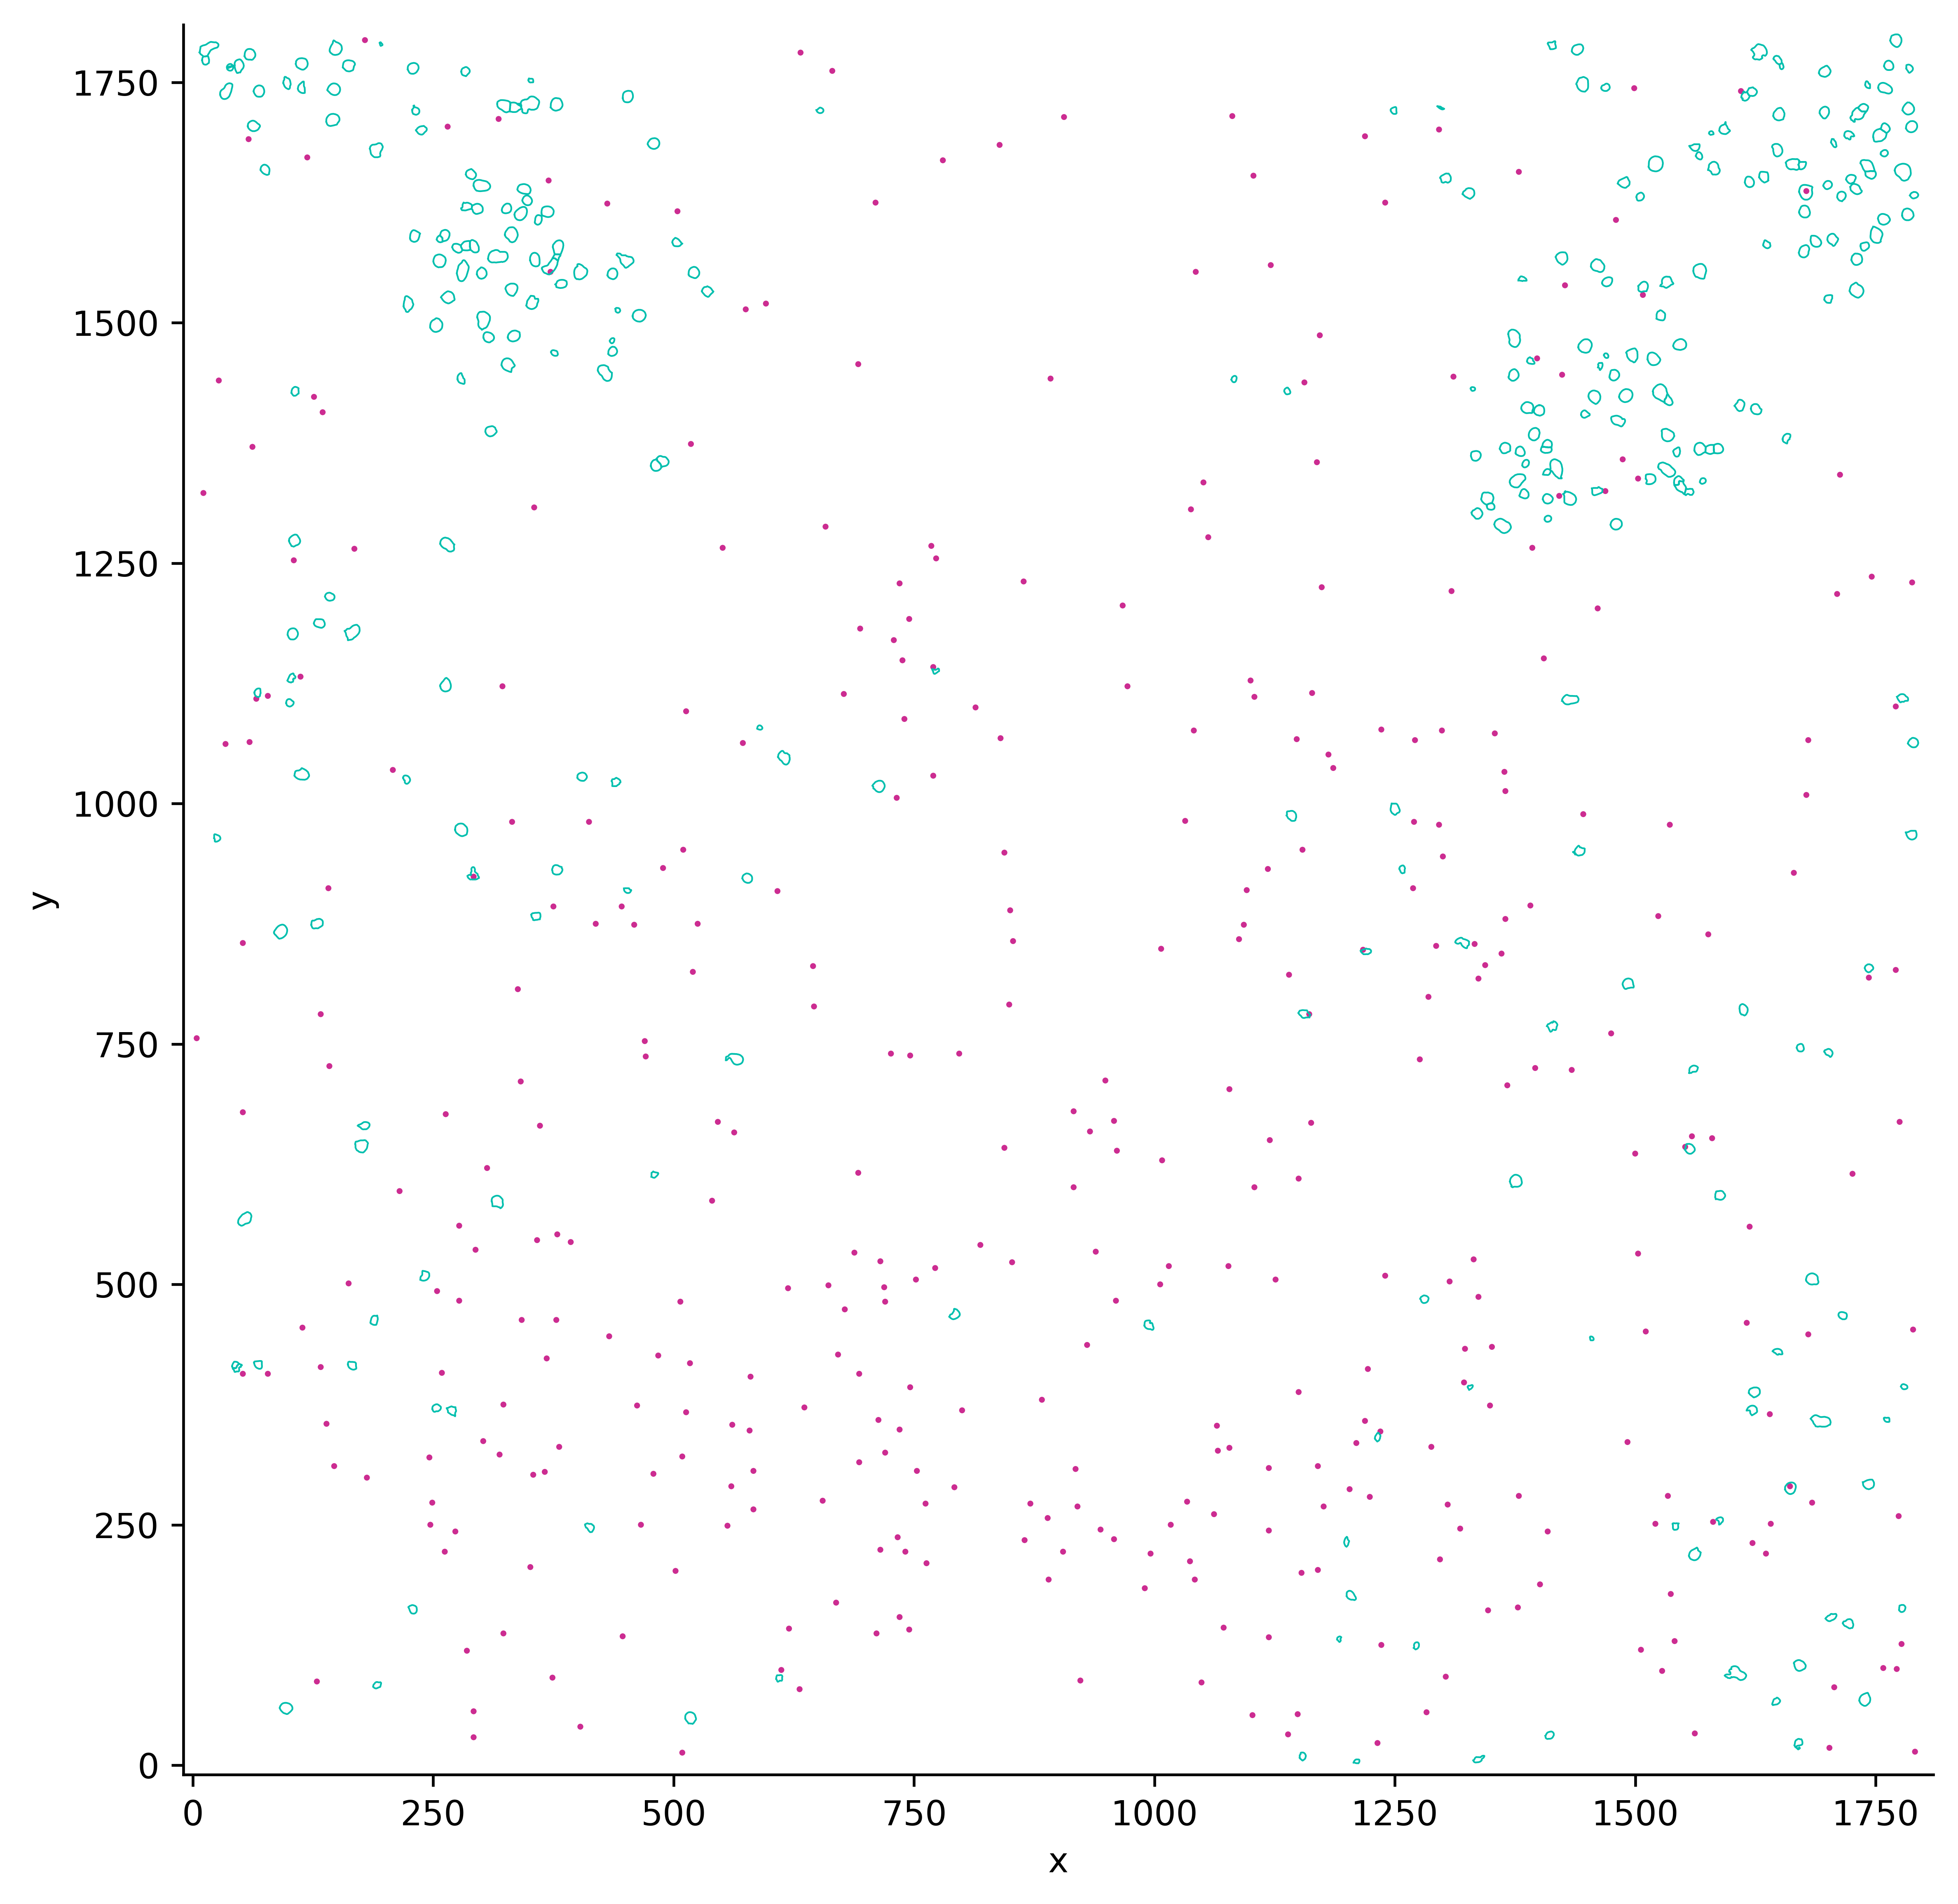

In [105]:
plot_doublets(doublets_df=doublets_all, boundary_df=None, MOD_boundary=MOD_boundaries)

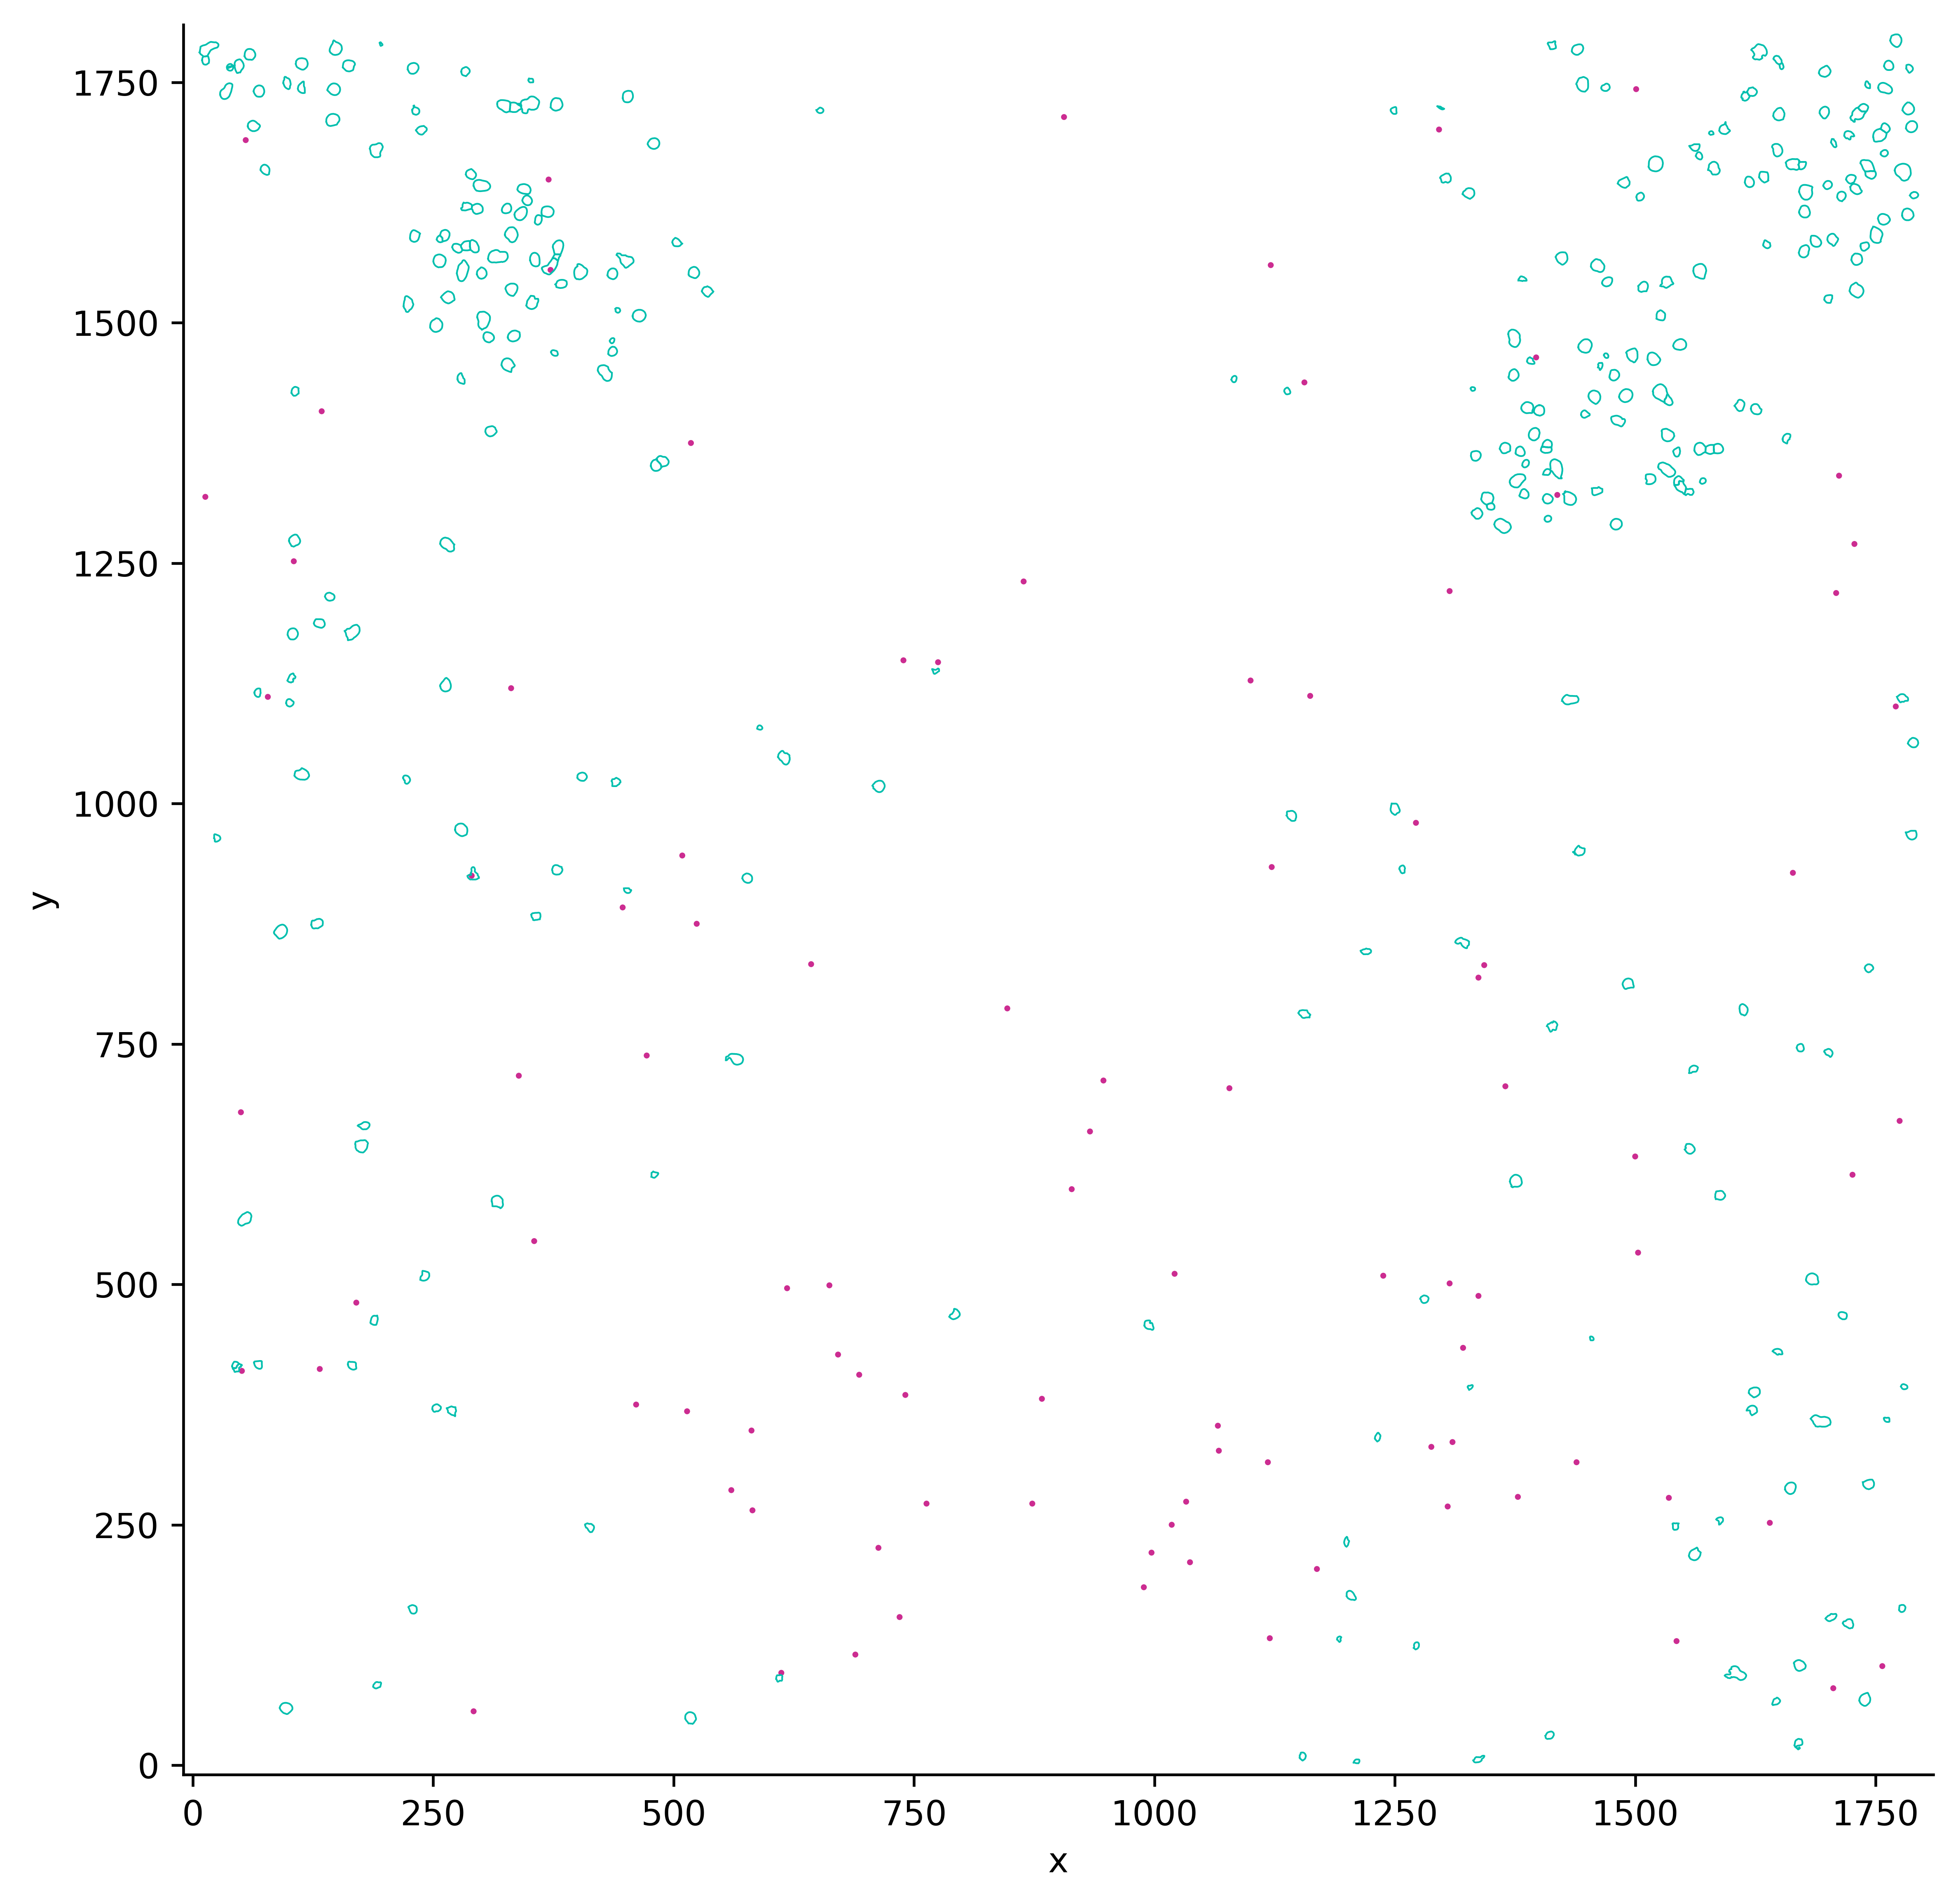

In [106]:
plot_doublets(doublets_df=doublets_exMOD, boundary_df=None, MOD_boundary=MOD_boundaries)

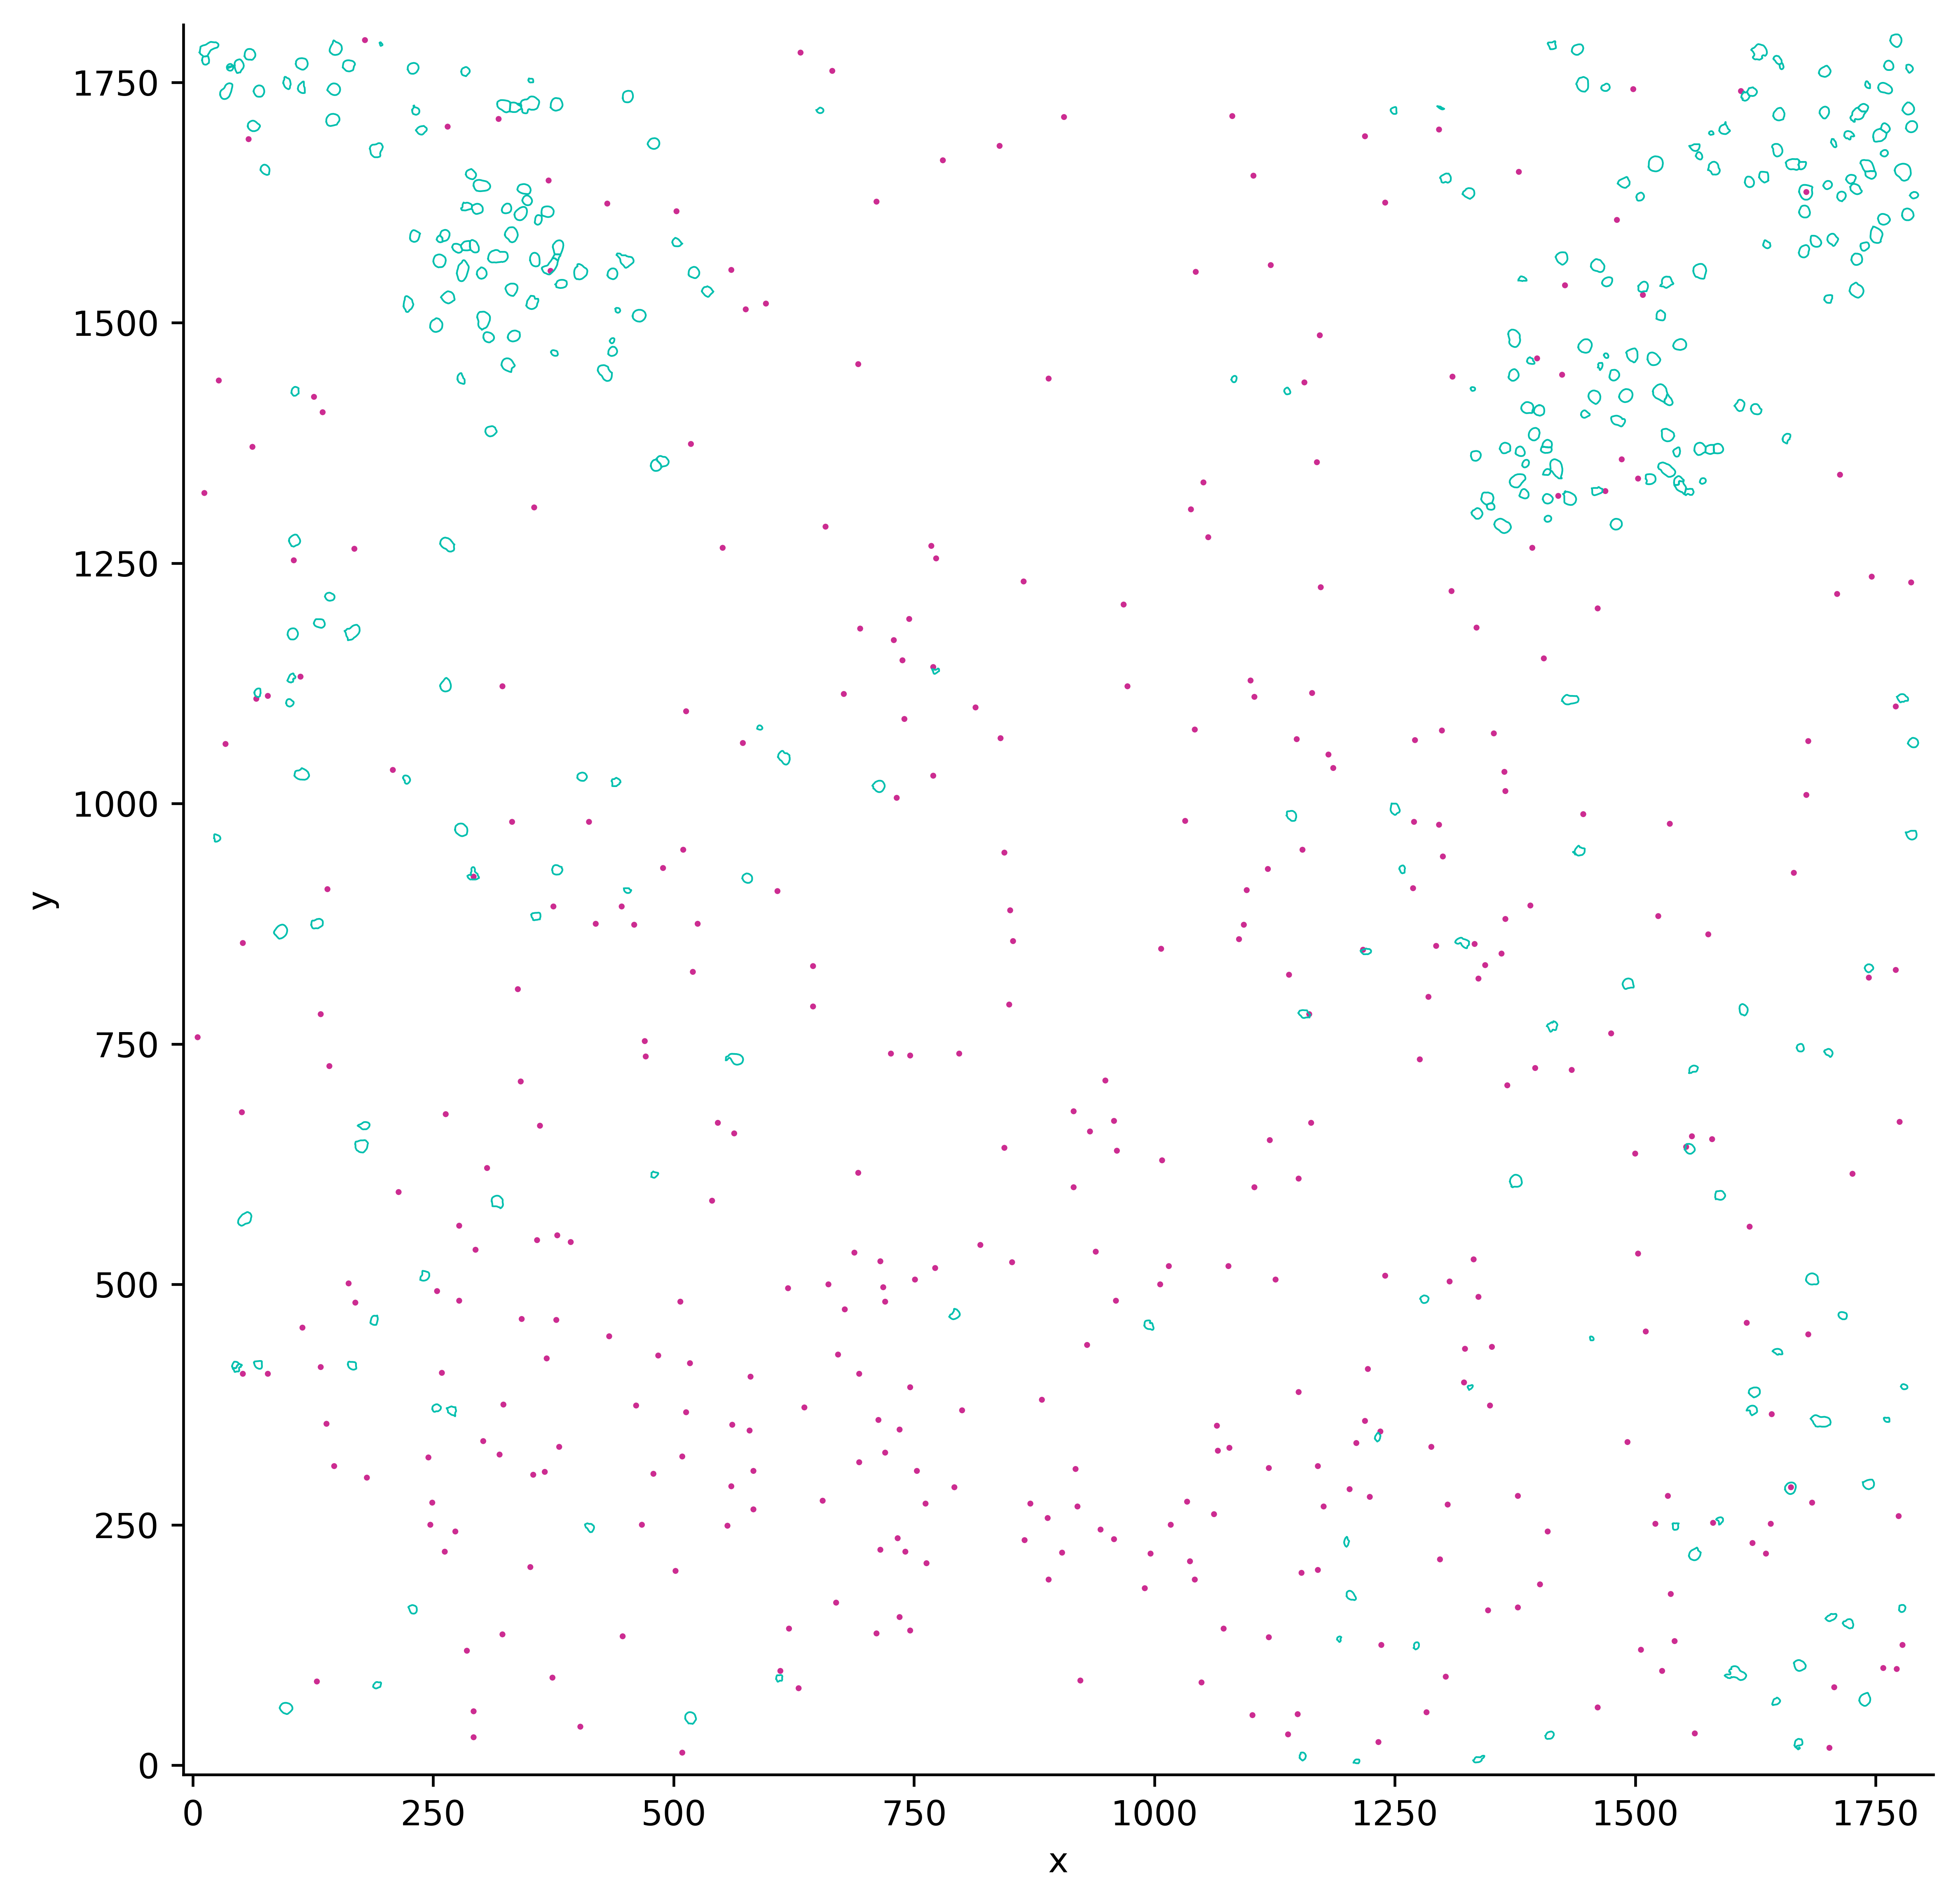

In [107]:
plot_doublets(doublets_df=doublets_exMOD1, boundary_df=None, MOD_boundary=MOD_boundaries)

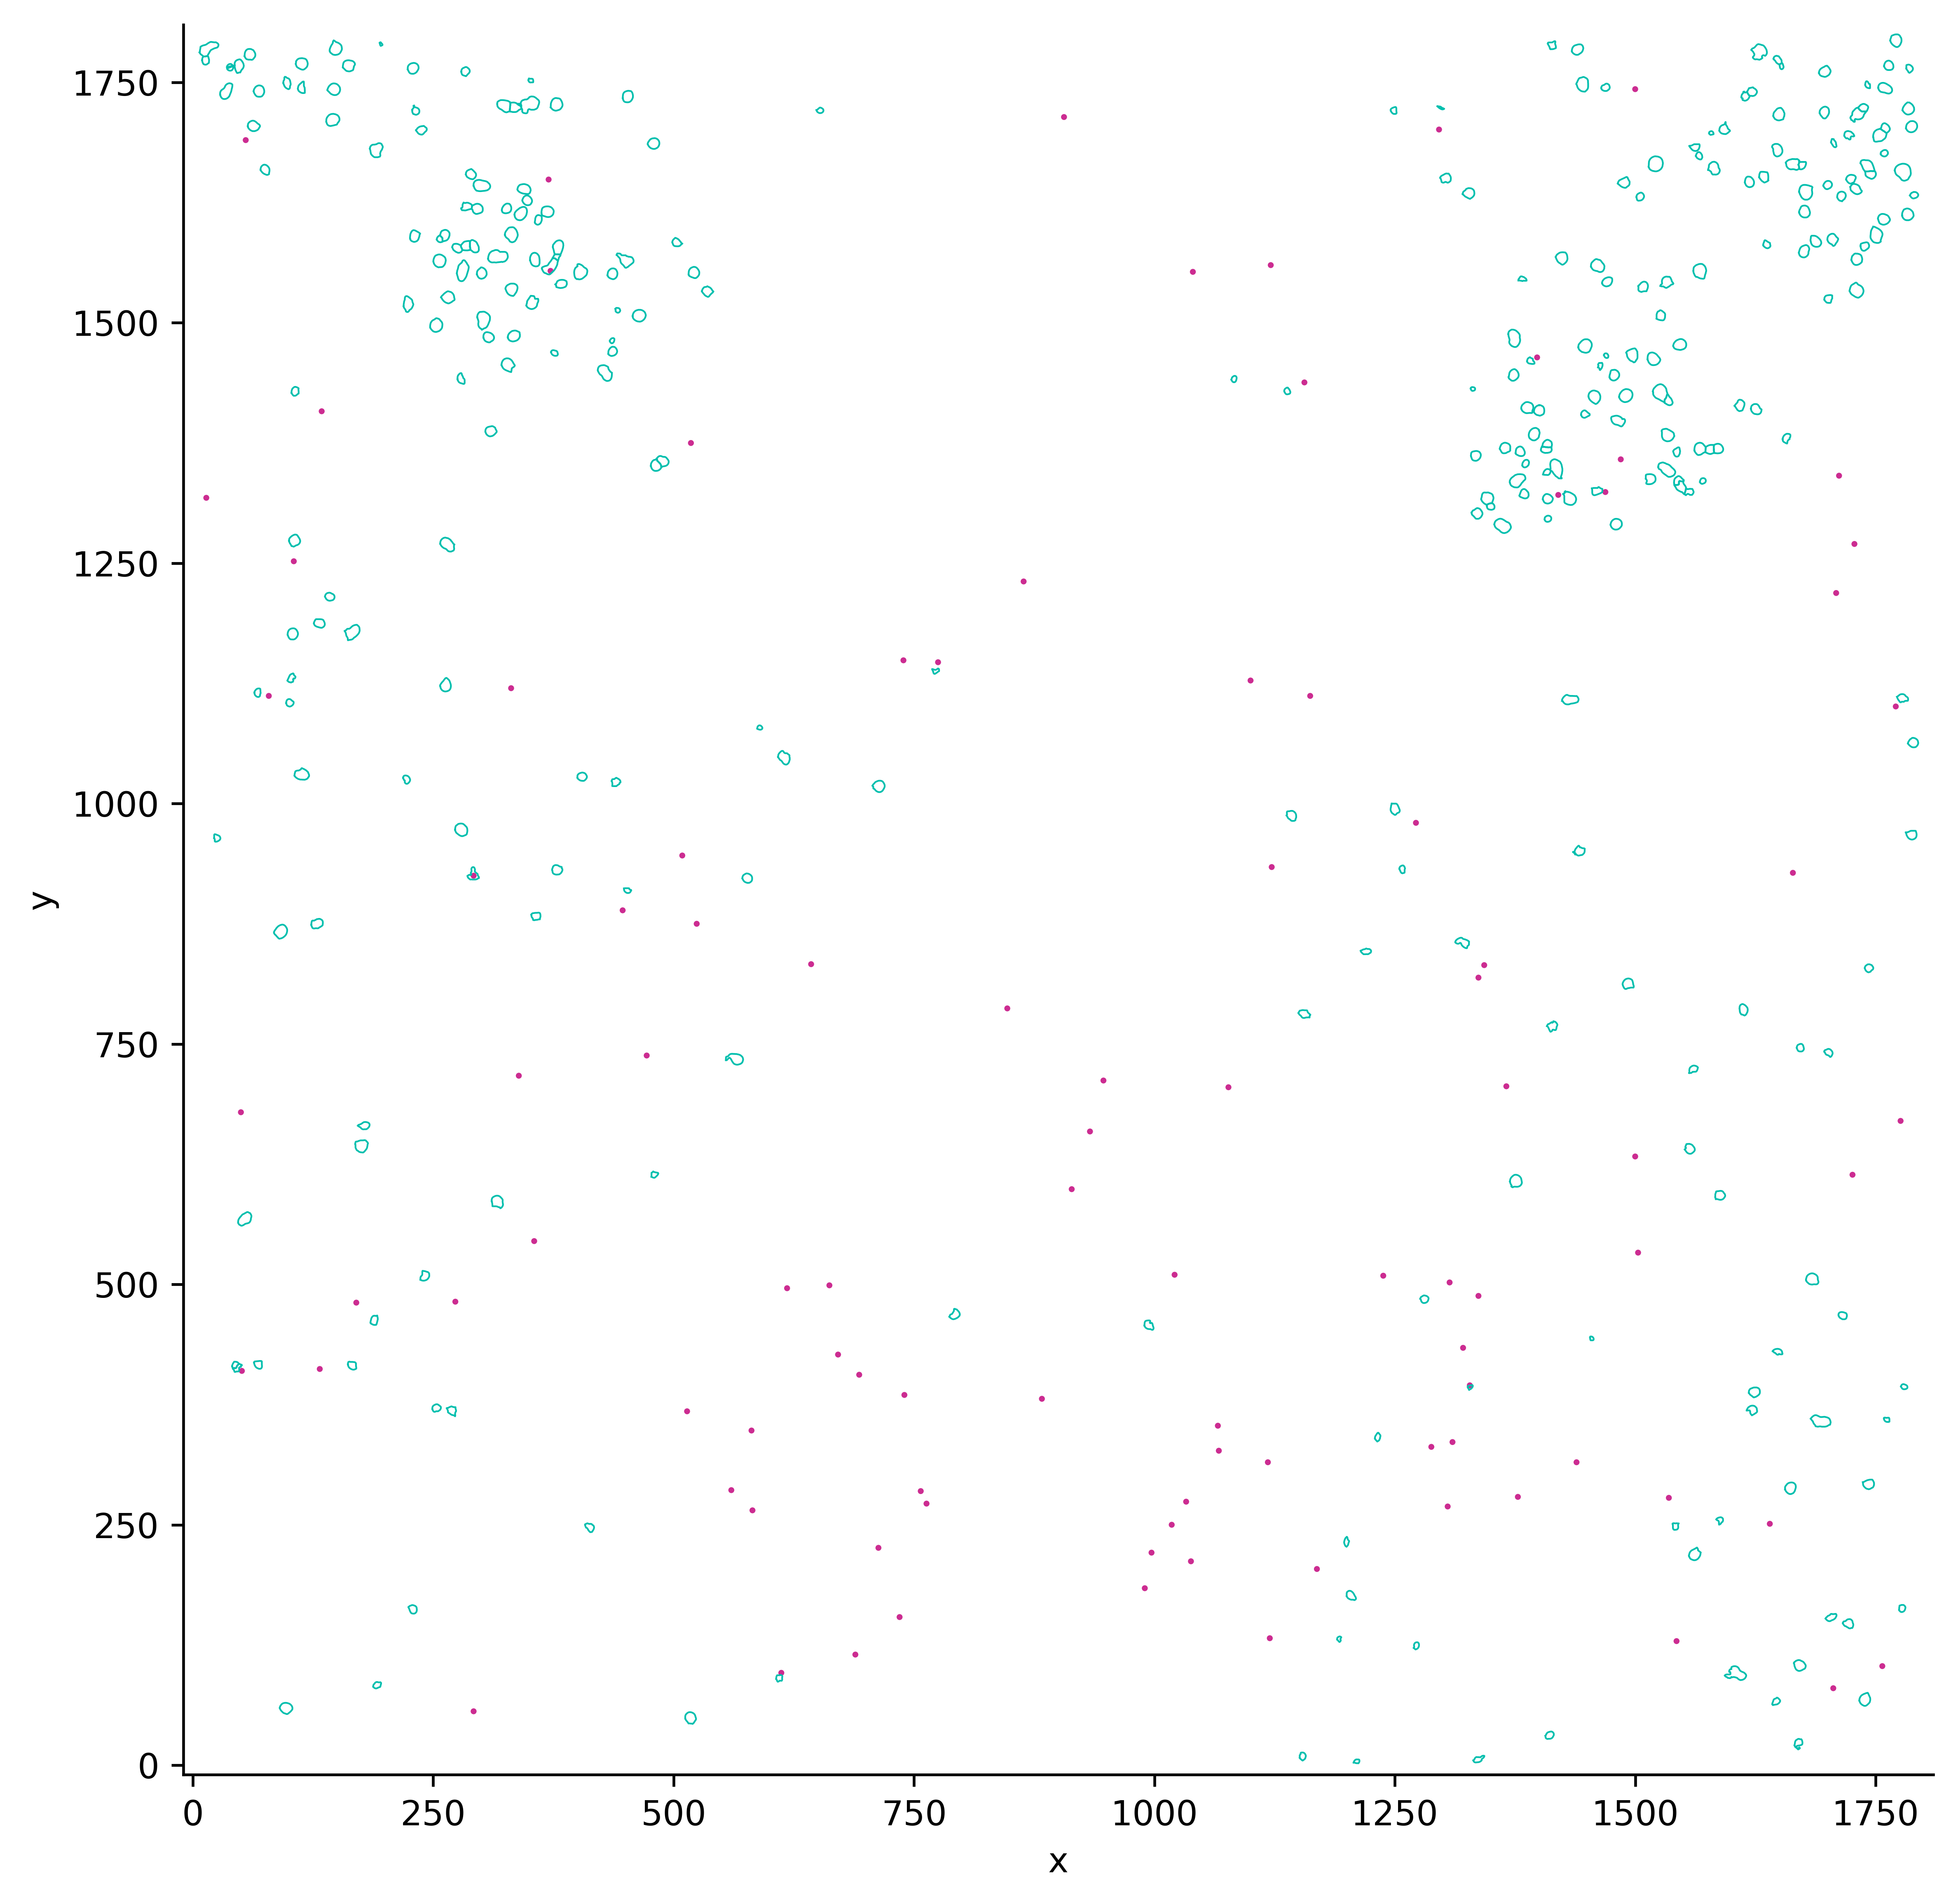

In [108]:
plot_doublets(doublets_df=doublets_exMOD2, boundary_df=None, MOD_boundary=MOD_boundaries)